<a href="https://colab.research.google.com/github/kicysh/final_task_of_world_model_lecture_2021/blob/main/src/tmp_sub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# セットアップ

- scVIのインストール
- データのダウンロード
- 必要なパッケージのインストール

In [1]:
!git clone https://github.com/tabdelaal/scVI

Cloning into 'scVI'...
remote: Enumerating objects: 10007, done.
remote: Total 10007 (delta 0), reused 0 (delta 0), pack-reused 10007
Receiving objects: 100% (10007/10007), 108.57 MiB | 31.09 MiB/s, done.
Resolving deltas: 100% (7177/7177), done.


In [2]:
!pip install /content/scVI

Processing ./scVI
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 4.8 MB 4.7 MB/s 
     |████████████████████████████████| 96 kB 4.4 MB/s 
     |████████████████████████████████| 96 kB 4.7 MB/s 
     |████████████████████████████████| 2.0 MB 39.0 MB/s 
     |████████████████████████████████| 8.8 MB 14.7 MB/s 
     |████████████████████████████████| 48 kB 4.9 MB/s 
     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 35.7 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for scvi: filename=scvi-0.6.4-py2.py3-none-any.whl size=139

In [3]:
!mkdir data
!gsutil cp gs://h5ad/2019-02-Pijuan-Sala-et-al-Nature/pijuan_sala_atlas.h5ad /content/data

Copying gs://h5ad/2019-02-Pijuan-Sala-et-al-Nature/pijuan_sala_atlas.h5ad...
/ [1 files][  1.0 GiB/  1.0 GiB]   45.7 MiB/s                                   
Operation completed over 1 objects/1.0 GiB.                                      


In [4]:
!pip install scanpy

# LDVAEの実行

In [5]:
path_of_data = '/content/data/pijuan_sala_atlas.h5ad'

In [6]:
from scvi.dataset import AnnDatasetFromAnnData
from scvi.models import LDVAE
from scvi.inference import UnsupervisedTrainer
from scvi.inference.posterior import Posterior

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [38]:
import scanpy as sc
adata = sc.read_h5ad(path_of_data)
adata

AnnData object with n_obs × n_vars = 139331 × 29452
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster'
    var: 'gene_name'

In [ ]:
cells_dataset = AnnDatasetFromAnnData(adata)

In [ ]:
cells_dataset.nb_cells

In [ ]:
idx = adata.obs.query('not doublet').index
adata = adata[idx]

cells_dataset = AnnDatasetFromAnnData(adata)

cell_numbers = [2500 * 2 ** i for i in range(10)] + [idx.shape[0]]


In [ ]:
cells_dataset.subsample_genes(1000)

In [12]:
vae = LDVAE(
    cells_dataset.nb_genes,
    reconstruction_loss='nb',
    use_batch_norm=True,
    latent_distribution='normal',
    n_latent=20
)

In [13]:
vae

LDVAE(
  (z_encoder): Encoder(
    (encoder): FCLayers(
      (fc_layers): Sequential(
        (Layer 0): Sequential(
          (0): Linear(in_features=1000, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU()
          (3): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (mean_encoder): Linear(in_features=128, out_features=20, bias=True)
    (var_encoder): Linear(in_features=128, out_features=20, bias=True)
  )
  (l_encoder): Encoder(
    (encoder): FCLayers(
      (fc_layers): Sequential(
        (Layer 0): Sequential(
          (0): Linear(in_features=1000, out_features=128, bias=True)
          (1): BatchNorm1d(128, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU()
          (3): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (mean_encoder): Linear(in_features=128, out_features=1, bias=True)
    (var_encoder): Linear(in_features=1

In [14]:
cells_dataset.gene_names

array(['ENSMUSG00000025902', 'ENSMUSG00000025927', 'ENSMUSG00000026124',
       'ENSMUSG00000026043', 'ENSMUSG00000045954', 'ENSMUSG00000026102',
       'ENSMUSG00000061816', 'ENSMUSG00000026193', 'ENSMUSG00000039323',
       'ENSMUSG00000026185', 'ENSMUSG00000026175', 'ENSMUSG00000033227',
       'ENSMUSG00000006538', 'ENSMUSG00000026208', 'ENSMUSG00000004872',
       'ENSMUSG00000026166', 'ENSMUSG00000026295', 'ENSMUSG00000034353',
       'ENSMUSG00000007805', 'ENSMUSG00000101995', 'ENSMUSG00000050777',
       'ENSMUSG00000058665', 'ENSMUSG00000026459', 'ENSMUSG00000003051',
       'ENSMUSG00000026421', 'ENSMUSG00000041801', 'ENSMUSG00000026418',
       'ENSMUSG00000026414', 'ENSMUSG00000026395', 'ENSMUSG00000026358',
       'ENSMUSG00000026357', 'ENSMUSG00000026478', 'ENSMUSG00000042684',
       'ENSMUSG00000026473', 'ENSMUSG00000040181', 'ENSMUSG00000026576',
       'ENSMUSG00000026568', 'ENSMUSG00000040723', 'ENSMUSG00000040713',
       'ENSMUSG00000026688', 'ENSMUSG00000026678', 

In [15]:
trainer = UnsupervisedTrainer(
    vae,
    cells_dataset,
    use_cuda=True,
    metrics_to_monitor=['reconstruction_error'],
    frequency=1,
    n_epochs_kl_warmup=None
)

trainer.train(lr=7e-3, n_epochs=100)

[2022-03-24 09:15:35,615] INFO - scvi.inference.inference | Training without KL warmup
training: 100%|██████████| 100/100 [33:04<00:00, 19.85s/it]


In [37]:
import pandas as pd

full = trainer.create_posterior(
    trainer.model,
    cells_dataset,
    shuffle=False
)

latent, batch_indices, labels = full.get_latent()

results = pd.DataFrame(latent, index=adata.obs.index)
results.to_csv('/content/z.csv')

W = vae.get_loadings()
W = pd.DataFrame(W, index=cells_dataset.gene_names)
W.to_csv('/content/w.csv')

ValueError: ignored

In [ ]:
w_df = pd.read_csv('/content/w.csv', index_col=0)
z_df = pd.read_csv('/content/z.csv', index_col=0)

In [29]:
w_df = w_df.add_prefix('w')
z_df = w_df.add_prefix('z')

In [30]:
%pylab inline
%config InlineBackend.figure_format ='retina'

import matplotlib.pyplot as plt
import time

import anndata
import matplotlib.colors as mcolors
import pandas as pd

import plotnine as p


Populating the interactive namespace from numpy and matplotlib


In [31]:
def Z_covariance(Z):
    Zcentered = Z - Z.mean(0)
    Zscaled = Z / Z.std(0)
    ZTZ = np.cov(Zscaled.T)
    
    eigen_values, _ = np.linalg.eig(ZTZ)
    singular_values = np.sqrt(eigen_values)
    variance_explained = singular_values / singular_values.sum()

    return ZTZ, variance_explained

In [32]:
_, variance_explained = Z_covariance(z_df)
idx = np.argsort(variance_explained)[::-1]

In [33]:
Z_df_ordered = pd.DataFrame(z_df.values[:, idx]).add_prefix('z')
Z_df_ordered.index = z_df.index
W_df_ordered = pd.DataFrame(w_df.values[:, idx]).add_prefix('w')
W_df_ordered.index = w_df.index

In [34]:
adata = anndata.read('/content/data/pijuan_sala_atlas.h5ad')
W_df_ordered = adata.var.loc[W_df_ordered.index].join(W_df_ordered)


In [35]:


text_shift = {
    (0, 'Fst'): (0.2, -0.2),
    (0, 'Pmp22'): (-0.1, -0.3),
    (0, 'Hoxaas3'): (0.0, 0.3),
    (0, 'Acta2'): (0.0, 0.2),
    (0, 'Nnat'): (0.0, 0.5),
    (0, 'Ifitm1'): (0.0, 0.2),
    
    (1, 'Srgn'): (0., -0.2),
    (1, 'Amn'): (-0.7, 0.),
    
    (2, 'Crabp2'): (0.0, 0.4),
    (2, 'Tdgf1'): (0.0, 0.4),
    (2, 'Cer1'): (-0.6, 0.0),
    (2, 'T'): (-1.3, 0.0),
    
    (3, 'Cdx1'): (0.0, 0.4),
    (3, 'Cdx2'): (-1.0, 0.7),
    (3, 'Cited1'): (-1.6, -0.0),
    (3, 'Phlda2'): (-0.7, 0.0),
    (3, 'T'): (0.0, 0.2),
    (3, 'Ifitm1'): (-0.2, 0.0),
#     (3, 'Rspo2'): (-0.3, 0.0),
#     (3, 'Htr2c'): (0.6, 0.1),
#     (3, 'Col1a1'): (0.0, 0.2),
    
#     (4, 'Ttn'): (0.0, -0.4),
#     (4, 'Sntb1'): (0.0, -0.3),
#     (4, 'Colec12'): (-1.1, 0.1),
#     (4, 'Adam12'): (0.1, 0.4),
#     (4, 'Spon1'): (0.0, 0.2),
#     (4, 'Gm3764'): (-0.2, 0.3),
#     (4, 'C130071C03Rik'): (1.5, -0.35),
    
}



['Nkx2-3', 'Tbx6', 'Cdx1', 'Hes7', 'Dll1', 'Pyy', 'Mesp2', 'Hoxaas3']
Categories (29411, object): ['0610005C13Rik', '0610006L08Rik', '0610007P14Rik', '0610009B22Rik', ...,
                             'mt-Nd4', 'mt-Nd4l', 'mt-Nd5', 'mt-Nd6']
['Prl7a1', 'Dlx5', 'Prl5a1', 'Sox10', 'Anxa1', 'Prl3d3', 'Prl3b1', 'Tfap2b']
Categories (29411, object): ['0610005C13Rik', '0610006L08Rik', '0610007P14Rik', '0610009B22Rik', ...,
                             'mt-Nd4', 'mt-Nd4l', 'mt-Nd5', 'mt-Nd6']
['Hbb-bs', 'Hbb-y', 'Hba-a2', 'Six6', 'Hba-a1', 'Hbb-bt', 'Hba-x', 'Treml1']
Categories (29411, object): ['0610005C13Rik', '0610006L08Rik', '0610007P14Rik', '0610009B22Rik', ...,
                             'mt-Nd4', 'mt-Nd4l', 'mt-Nd5', 'mt-Nd6']
['1700001C02Rik', 'Neurod4', 'Phox2b', 'Nkx2-6', 'Cryaa', '4930467K11Rik', 'Olig2', 'Vgll2']
Categories (29411, object): ['0610005C13Rik', '0610006L08Rik', '0610007P14Rik', '0610009B22Rik', ...,
                             'mt-Nd4', 'mt-Nd4l', 'mt-Nd5', 'mt-N

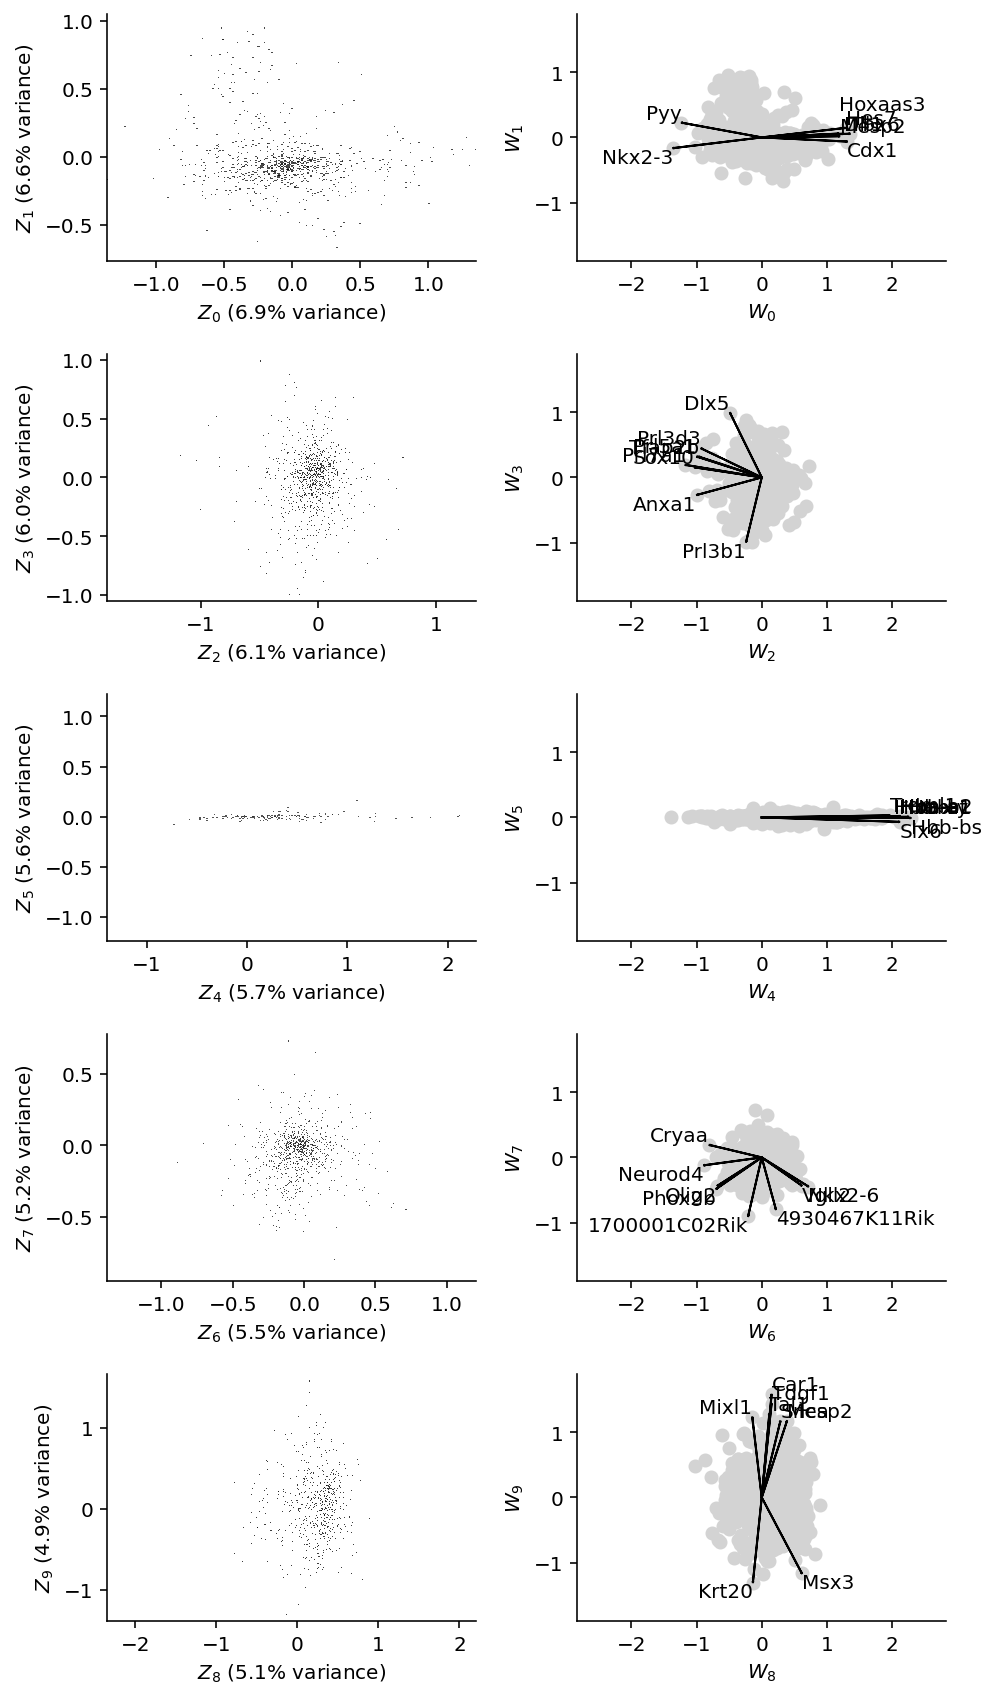

In [36]:
figsize(7, 12)
for i in range(5):
    
    # -- Z plot --
    
    plt.subplot(5, 2, 2 * i + 1)
    
    plt.hist2d(
        Z_df_ordered[f'z{2 * i}'], Z_df_ordered[f'z{2 * i + 1}'],
        bins=256,
        norm=mcolors.PowerNorm(0.25),
        cmap=cm.gray_r,
        rasterized=True
    )
    plt.axis('equal');
    plt.xlabel(f'$Z_{2 * i}$ ({variance_explained[idx][2 * i]:.1%} variance)')
    plt.ylabel(f'$Z_{2 * i + 1}$ ({variance_explained[idx][2 * i + 1]:.1%} variance)')
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # -- W plot --
    
    plt.subplot(5, 2, 2 * i + 2)
    
    w_columns = [f'w{2 * i}', f'w{2 * i + 1}']
    
    plt.scatter(
        W_df_ordered[w_columns[0]], W_df_ordered[w_columns[1]],
        c='lightgrey',
        rasterized=True
    )
    plt.axis('equal');
    plt.xlabel(f'$W_{2 * i}$')
    plt.ylabel(f'$W_{2 * i + 1}$')
    
    tmp_ = W_df_ordered.copy()
    tmp_['lnth'] = np.linalg.norm(tmp_[w_columns], axis=1)
    
    ggg = (
        tmp_
        .sort_values('lnth', ascending=False)
        .head(8)[['gene_name', 'lnth', *w_columns]]
    )
    print(ggg['gene_name'].values)
    
    texts = []
    arrows = []
    for g, r in ggg.iterrows():
        x_, y_ = r[w_columns[0]], r[w_columns[1]]
        
        ha = 'right'
        if x_ > 0:
            ha = 'left'
            
        va = 'top'
        if y_ > 0:
            va = 'bottom'
            
        arrows.append(plt.arrow(0, 0, x_, y_, length_includes_head=True))
        
        xs, ys = 0, 0
        if (i, r.gene_name) in text_shift:
            xs, ys = text_shift[(i, r.gene_name)]
        
        texts.append(plt.text(x_ + xs, y_ + ys, r.gene_name, ha=ha, va=va))

    plt.xlim(left=-3, right=3)
    plt.ylim(bottom=-3, top=3)
        
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
plt.tight_layout()
plt.savefig('/content/linear_pij_results2.pdf', bbox_inches='tight', dpi=400)

前処理  
- [Scanpyの真の力を僕達はまだ知らない](https://emoriroom.hatenablog.com/entry/2020/12/18/190000)
- [Scanpy: Preprocessing and clustering 3k PBMCs](https://singlecellanalysistutorial.readthedocs.io/en/latest/notebooks/Scanpy_PBMC.html)


In [ ]:
df = adata.to_df()

10056.1767578125

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [ ]:
class Inference_model(nn.Module):
    def __init__(self, cells_cnt, genes_cnt,z_dim):
        super(Inference_model, self).__init__()
        self.cells_cnt = cells_cnt
        self.genes_cnt = genes_cnt
        self.g = nn.Sequential(nn.Linear(cells_cnt,128),
                               nn.Relu(),)
        self.g_mu = nn.Linear(128,z_dim)
        self.g_sigma = nn.Linear(128,z_dim)

    def forward(self,x):
        g_x = self.g(x)
        mu = self.g_mu(g_x)
        sigma = self.g_sigma(g_x)
        epsilon = torch.randn(mu.shape).to(device)
        return sigma + mu * epsilon


class Generative_model(nn.Module):
    def __init__(self,cells_cnt, genes_cnt,z_dim):
        super(Generative_model, self).__init__()
        self.z_dim = z_dim
        self.cells_cnt = cells_cnt
        self.genes_cnt = genes_cnt
        self.emb = nn.Embedding(k_dim,z_dim)

    def forward(self):
        pass

class LDVAE(nn.Module):
    def __init__(self, cells_cnt, genes_cnt,z_dim):
        super(LDVAE, self).__init__()
        self.z_dim = z_dim
        self.cells_cnt = cells_cnt
        self.genes_cnt = genes_cnt
        self.emb = nn.Embedding(genes_cnt,z_dim)

    def forward(self):
        pass

class scVI(nn.Module):
    def __init__(self, cells_cnt, genes_cnt, z_dim):
        super(scVI, self).__init__()
        self.cells_cnt = cells_cnt
        self.genes_cnt = genes_cnt
        self.z_dim = z_dim
        self.inference_model = Inference_model(cells_cnt, genes_cnt, z_dim)
        self.ldvae = LDVAE(cells_cnt, genes_cnt, z_dim)
        self.generative_model = Generative_model(cells_cnt,genes_cnt, z_dim)
        
    def forward(self, x):
        z = self.inference_model(x)
        mu = self.ldvae(z)

In [ ]:
figsize(7, 12)
for i in range(5):
    
    # -- Z plot --
    
    plt.subplot(5, 2, 2 * i + 1)
    
    plt.hist2d(
        Z_df_ordered[f'z{2 * i}'], Z_df_ordered[f'z{2 * i + 1}'],
        bins=256,
        norm=mcolors.PowerNorm(0.25),
        cmap=cm.gray_r,
        rasterized=True
    )
    plt.axis('equal');
    plt.xlabel(f'$Z_{2 * i}$ ({variance_explained[idx][2 * i]:.1%} variance)')
    plt.ylabel(f'$Z_{2 * i + 1}$ ({variance_explained[idx][2 * i + 1]:.1%} variance)')
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # -- W plot --
    
    plt.subplot(5, 2, 2 * i + 2)
    
    w_columns = [f'w{2 * i}', f'w{2 * i + 1}']
    
    plt.scatter(
        W_df_ordered[w_columns[0]], W_df_ordered[w_columns[1]],
        c='lightgrey',
        rasterized=True
    )
    plt.axis('equal');
    plt.xlabel(f'$W_{2 * i}$')
    plt.ylabel(f'$W_{2 * i + 1}$')
    
    tmp_ = W_df_ordered.copy()
    tmp_['lnth'] = np.linalg.norm(tmp_[w_columns], axis=1)
    
    ggg = (
        tmp_
        .sort_values('lnth', ascending=False)
        .head(8)[['gene_name', 'lnth', *w_columns]]
    )
    print(ggg['gene_name'].values)
    
    texts = []
    arrows = []
    for g, r in ggg.iterrows():
        x_, y_ = r[w_columns[0]], r[w_columns[1]]
        
        ha = 'right'
        if x_ > 0:
            ha = 'left'
            
        va = 'top'
        if y_ > 0:
            va = 'bottom'
            
        arrows.append(plt.arrow(0, 0, x_, y_, length_includes_head=True))
        
        xs, ys = 0, 0
        if (i, r.gene_name) in text_shift:
            xs, ys = text_shift[(i, r.gene_name)]
        
        texts.append(plt.text(x_ + xs, y_ + ys, r.gene_name, ha=ha, va=va))

    plt.xlim(left=-3, right=3)
    plt.ylim(bottom=-3, top=3)
        
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
plt.tight_layout()
plt.savefig('figures/linear_pij_results.pdf', bbox_inches='tight', dpi=400)

[fig.1c 実装コード](https://github.com/pachterlab/SGYP_2019/blob/master/4.a%20Pijuan-Sala%20et%20al%20result%20figures.ipynb)


In [26]:
vae = LDVAE(
    cells_dataset.nb_genes,
    reconstruction_loss='nb',
    use_batch_norm=True,
    latent_distribution='normal',
    n_latent=20
)

In [27]:
trainer = UnsupervisedTrainer(
    vae,
    cells_dataset,
    use_cuda=True,
    metrics_to_monitor=['reconstruction_error'],
    frequency=1,
    n_epochs_kl_warmup=None
)

trainer.train(lr=7e-3, n_epochs=100)

[2022-03-24 09:49:22,479] INFO - scvi.inference.inference | Training without KL warmup
training: 100%|██████████| 100/100 [33:26<00:00, 20.06s/it]
